In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 假设importance.csv包含Feature列和Importance列
csv_file1_path = "C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_importance.csv"
csv_file2_path = "C:/Users/Lenovo/Desktop/new_study/CNS/data/ASP.csv"

# 读取Features CSV文件
features_df = pd.read_csv(csv_file1_path)
# 读取训练集和Label的CSV文件
training_data_df = pd.read_csv(csv_file2_path)

In [3]:
print(features_df)

                       Feature  Importance
0            _NormalizedVDWVC3    0.152742
1            _PolarizabilityC3    0.130987
2                  _PolarityC3    0.088305
3                  _PolarityC2    0.051573
4                    _ChargeC1    0.049703
5                   _ChargeT23    0.040763
6                charge of all    0.040754
7                 _ChargeD3100    0.038966
8              negative_charge    0.029184
9                    _ChargeC3    0.027597
10        _NormalizedVDWVD1100    0.027542
11                          KV    0.023979
12    _SolventAccessibilityT23    0.020302
13          _PolarizabilityT12    0.020281
14                _ChargeD3075    0.019816
15          _NormalizedVDWVT12    0.018545
16     _SolventAccessibilityC3    0.015801
17                           P    0.014827
18        _PolarizabilityD1100    0.014582
19                          GG    0.014409
20                _PolarityT13    0.013669
21        _HydrophobicityD2100    0.013210
22         

In [4]:
print(training_data_df)

                                  SEQUENCE       A       R       N       D  \
0                              IKQLLHFFQRF   0.000   9.091   0.000   0.000   
1                     RLLRRLLRRLLRRLLRRLLR   0.000  50.000   0.000   0.000   
2                  GIGKFLHSAKKFGKAFVGEIMNS   8.696   0.000   4.348   0.000   
3                              LKRFLKWFKRF   0.000  18.182   0.000   0.000   
4                              KLFKRWKHLFR   0.000  18.182   0.000   0.000   
...                                    ...     ...     ...     ...     ...   
1195         AVEFLLDQSIADSPLAKKVEFLESKGLTQ  10.345   0.000   0.000   6.897   
1196           GQTSISKGLNYLTIMAPGNLWHMRNNF   3.704   3.704  14.815   0.000   
1197    WGYSKHNGPENWHKDFPIANGDRQSPVDIDTATA   8.824   2.941   8.824  11.765   
1198        IELFNAFPSLLRHFPGSHNTIFKNMTEQRK   3.333   6.667  10.000   0.000   
1199  RLGLLLSVLAATLAQAPAPDVPGCSRGSCYPATGDL  16.667   5.556   0.000   5.556   

          C       E       Q       G      H  ...  _Polarizabilit

In [5]:
# ascending=False，降序排列
top_features = features_df.sort_values(by="Importance", ascending=False).head(22)['Feature'].tolist()
print(top_features)

['_NormalizedVDWVC3', '_PolarizabilityC3', '_PolarityC3', '_PolarityC2', '_ChargeC1', '_ChargeT23', 'charge of all', '_ChargeD3100', 'negative_charge', '_ChargeC3', '_NormalizedVDWVD1100', 'KV', '_SolventAccessibilityT23', '_PolarizabilityT12', '_ChargeD3075', '_NormalizedVDWVT12', '_SolventAccessibilityC3', 'P', '_PolarizabilityD1100', 'GG', '_PolarityT13', '_HydrophobicityD2100']


In [6]:
# 从原始数据集中获得前22的列
selected_columns = training_data_df[top_features]
print(selected_columns)
print('-------------------------------------------------------------------------')
# 初始化标准化器
scaler = StandardScaler()
# 对每一列数据进行标准化
selected_columns_standardized = scaler.fit_transform(selected_columns)
print(selected_columns_standardized)

      _NormalizedVDWVC3  _PolarizabilityC3  _PolarityC3  _PolarityC2  \
0                 0.545              0.545        0.273        0.182   
1                 0.500              0.500        0.500        0.000   
2                 0.391              0.391        0.217        0.087   
3                 0.818              0.818        0.455        0.000   
4                 0.818              0.818        0.545        0.000   
...                 ...                ...          ...          ...   
1195              0.172              0.172        0.103        0.207   
1196              0.296              0.296        0.111        0.222   
1197              0.265              0.265        0.147        0.235   
1198              0.367              0.367        0.200        0.267   
1199              0.083              0.083        0.056        0.139   

      _ChargeC1  _ChargeT23  charge of all  _ChargeD3100  negative_charge  \
0         0.182       0.000              3         0.000  

In [7]:
# 获取应变量标签
y = training_data_df["MIC"]
y = np.log(y)
# 初始化线性回归模型
linear_regressor = LinearRegression()

In [8]:
# 划分数据集和测试集
X_train, X_test, y_train, y_test = train_test_split(selected_columns_standardized, y, test_size=0.2, random_state=0)

print(X_train)
print(y_train)

[[-0.27128226 -0.27128226 -0.11892435 ...  3.77647904  0.30544919
   0.57523904]
 [-0.24830157 -0.24830157 -0.73422477 ... -0.32850554 -0.75986056
   0.57523904]
 [-0.85728985 -0.85728985 -1.10664345 ... -0.32850554 -0.6656495
   0.08693151]
 ...
 [ 0.45260947  0.45260947  0.36683914 ... -0.32850554  1.8852963
   0.21479875]
 [ 0.09066361  0.09066361  0.05918893 ... -0.32850554 -0.45548635
   0.57523904]
 [ 0.36068671  0.36068671 -0.18369281 ... -0.32850554 -0.18010016
   0.32909208]]
867     9.010913
741     9.010913
467     9.010913
442     9.010913
610     9.010913
          ...   
1033    9.010913
763     9.010913
835     9.010913
559     9.010913
684     9.010913
Name: MIC, Length: 960, dtype: float64


In [15]:
# 拟合模型
linear_regressor.fit(X_train, y_train)

# 预测模型
y_pred = linear_regressor.predict(X_test)

In [16]:
# 计算回归分析的评估指标
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印结果
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.1415673579657866
Mean Absolute Error: 1.0497101862856284
R-squared: 0.5897879900332337


In [17]:
# 获取特征系数
coefficients = linear_regressor.coef_
coefficients_df = pd.DataFrame({'Feature': top_features, 'Coefficient': coefficients})
# 按照系数降序排列
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
# 打印每个特征的系数
for feature, coef in zip(top_features, coefficients):
    print(f"{feature}: {coef}")

_NormalizedVDWVC3: -0.18672530022460745
_PolarizabilityC3: -0.18672530022460765
_PolarityC3: -0.09094217345653402
_PolarityC2: -0.1382683231080245
_ChargeC1: -0.39660736362343896
_ChargeT23: 0.10367317077710242
charge of all: -0.24561202983128402
_ChargeD3100: 0.7222167684652765
negative_charge: -0.14783281278350946
_ChargeC3: -0.01175400502030527
_NormalizedVDWVD1100: 0.7097411717857232
KV: -0.09138083352269531
_SolventAccessibilityT23: 0.3058092185076527
_PolarizabilityT12: 0.19186229187757647
_ChargeD3075: -0.2337445011350737
_NormalizedVDWVT12: -0.18407712583934407
_SolventAccessibilityC3: 0.05743295251772224
P: 0.16621871194970772
_PolarizabilityD1100: -0.38968085405117764
GG: -0.14787282840567967
_PolarityT13: -0.34676108978083564
_HydrophobicityD2100: -0.051964695068785


In [18]:
coefficients_df.to_csv("C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_regression_coefficients.csv", index=False) #不将 DataFrame 的索引写入到 CSV 文件。

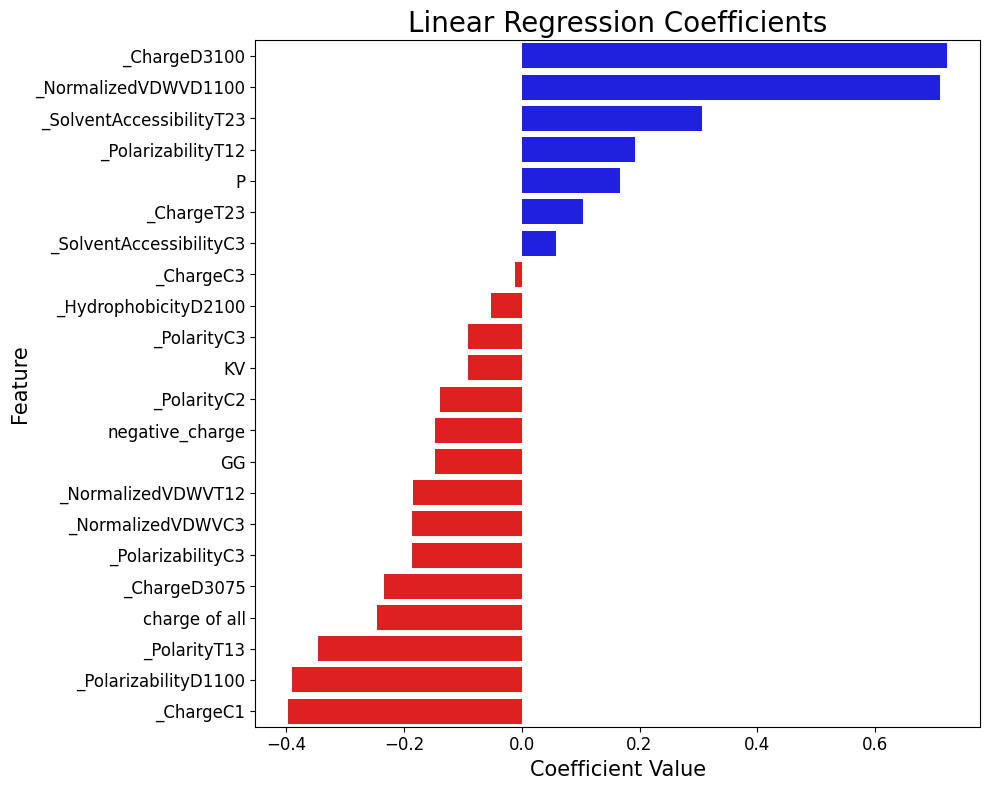

In [19]:
# 按照Coefficient列排序，大的值在上面
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# 设置图形大小
plt.figure(figsize=(10, 8))

# 为正负系数分配颜色
colors = ['b' if coef > 0 else 'r' for coef in coefficients_df['Coefficient']]

# 使用seaborn的barplot函数创建一个横向的柱状图，加入颜色映射
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette=colors)

plt.title('Linear Regression Coefficients', fontsize=20)
plt.xlabel('Coefficient Value', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自动调整布局
plt.tight_layout()

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_regression_coefficients_figures.png")

# 显示图形
plt.show()

In [20]:
#获得截距
intercept = linear_regressor.intercept_
print(intercept)
intercept_term = f"{intercept}"
# 构建线性回归方程
equation = " + ".join(f"{row['Coefficient']} * {row['Feature']}" for index, row in coefficients_df.iterrows())
linear_regression_expression = f"y = {equation} + {intercept_term}"
print(linear_regression_expression)

7.889348059806732
y = 0.7222167684652765 * _ChargeD3100 + 0.7097411717857232 * _NormalizedVDWVD1100 + 0.3058092185076527 * _SolventAccessibilityT23 + 0.19186229187757647 * _PolarizabilityT12 + 0.16621871194970772 * P + 0.10367317077710242 * _ChargeT23 + 0.05743295251772224 * _SolventAccessibilityC3 + -0.01175400502030527 * _ChargeC3 + -0.051964695068785 * _HydrophobicityD2100 + -0.09094217345653402 * _PolarityC3 + -0.09138083352269531 * KV + -0.1382683231080245 * _PolarityC2 + -0.14783281278350946 * negative_charge + -0.14787282840567967 * GG + -0.18407712583934407 * _NormalizedVDWVT12 + -0.18672530022460745 * _NormalizedVDWVC3 + -0.18672530022460765 * _PolarizabilityC3 + -0.2337445011350737 * _ChargeD3075 + -0.24561202983128402 * charge of all + -0.34676108978083564 * _PolarityT13 + -0.38968085405117764 * _PolarizabilityD1100 + -0.39660736362343896 * _ChargeC1 + 7.889348059806732


In [21]:
# 使用生成的表达式进行回归值的预测
def predict_regression_value(features, coefficients):
    return features @ coefficients + intercept

selected_regression_features = coefficients_df['Feature'].tolist()
selected_regression_features_value = training_data_df[selected_regression_features]
coefficients_list = coefficients_df['Coefficient'].tolist()
coefficients_array = np.array(coefficients_list)

# 初始化标准化器
scaler = StandardScaler()
# 对每一列数据进行标准化
selected_regression_features_value_standardized = scaler.fit_transform(selected_regression_features_value)
#print(selected_regression_features_value)
#print(selected_regression_features_value_standardized)


In [22]:
predicted_regression_value = predict_regression_value(selected_regression_features_value_standardized, coefficients_array)


predicted_regression_value_df = pd.DataFrame({'Value':predicted_regression_value})
print(predicted_regression_value_df)
#predicted_regression_true_value = np.power(10,predicted_regression_value)
#print(f"Predicted Regression True Value: ")
#print(predicted_regression_true_value)
#predicted_regression_true_value.to_csv("C:/Users/Lenovo/Desktop/regression_value.csv",index=False)

          Value
0      3.893671
1      2.297115
2      7.598961
3      1.958565
4      2.006330
...         ...
1195   9.280535
1196   7.299332
1197   9.344056
1198   8.756788
1199  10.206209

[1200 rows x 1 columns]


In [23]:
# 从原始数据集中获取LABEL
LABEL_values = pd.DataFrame({'LABEL':training_data_df['LABEL']})
# print(LABEL_values)
# 合并两个DataFrame
merged_df = pd.concat([predicted_regression_value_df, LABEL_values], axis=1)

# 划分两类
AMP_predicted = merged_df[merged_df['LABEL'] == 1]
NON_AMP_predicted = merged_df[merged_df['LABEL'] == 0]

#扔掉非零项
AMP_predicted_clean = AMP_predicted.dropna()
NON_AMP_predicted_clean = NON_AMP_predicted.dropna()

# 求"Value"列的平均值
average_value = AMP_predicted_clean['Value'].mean()

print(AMP_predicted_clean)
print(NON_AMP_predicted_clean)
#print(average_value)

        Value  LABEL
0    3.893671      1
1    2.297115      1
2    7.598961      1
3    1.958565      1
4    2.006330      1
..        ...    ...
201  2.485103      1
202  2.762249      1
203  4.878134      1
204  2.762249      1
205  3.143593      1

[206 rows x 2 columns]
          Value  LABEL
206    8.914087      0
207    7.740855      0
208    9.632609      0
209    8.106923      0
210    9.201877      0
...         ...    ...
1195   9.280535      0
1196   7.299332      0
1197   9.344056      0
1198   8.756788      0
1199  10.206209      0

[994 rows x 2 columns]


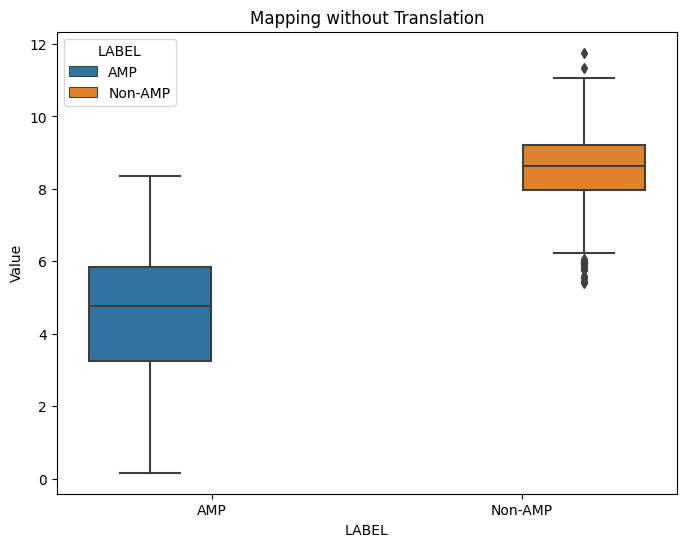

In [24]:
# 合并两个DataFrame
merged_final_df = pd.concat([AMP_predicted_clean, NON_AMP_predicted_clean], ignore_index=True)
merged_final_df['LABEL'] = merged_final_df['LABEL'].replace({0: 'Non-AMP', 1: 'AMP'})
# 使用Seaborn绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='LABEL', y='Value', hue='LABEL', data=merged_final_df)
plt.title('Mapping without Translation')

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_regression_boxplot_figures.png")

plt.show()

In [25]:
def sig(x):
    return 1/(1 + np.exp((x - np.log(600))))


# 使用 sig 函数映射到 0-1 范围
transformed_values = sig(predicted_regression_value)
transformed_values_df = pd.DataFrame({'Value':transformed_values})

print(transformed_values_df)

         Value
0     0.924370
1     0.983695
2     0.231114
3     0.988323
4     0.987758
...        ...
1195  0.052970
1196  0.288557
1197  0.049873
1198  0.086285
1199  0.021684

[1200 rows x 1 columns]


In [26]:
# 从原始数据集中获取LABEL
LABEL_values = pd.DataFrame({'LABEL':training_data_df['LABEL']})
print(LABEL_values)

      LABEL
0         1
1         1
2         1
3         1
4         1
...     ...
1195      0
1196      0
1197      0
1198      0
1199      0

[1200 rows x 1 columns]


In [27]:
# 合并两个DataFrame
merged_df = pd.concat([transformed_values_df, LABEL_values], axis=1)

# 划分两类
AMP_predicted = merged_df[merged_df['LABEL'] == 1]
NON_AMP_predicted = merged_df[merged_df['LABEL'] == 0]

AMP_predicted_clean = AMP_predicted.dropna()
NON_AMP_predicted_clean = NON_AMP_predicted.dropna()

# 求"Value"列的平均值
average_value = AMP_predicted_clean['Value'].mean()

print(AMP_predicted_clean)
print(NON_AMP_predicted_clean)
#print(average_value)

        Value  LABEL
0    0.924370      1
1    0.983695      1
2    0.231114      1
3    0.988323      1
4    0.987758      1
..        ...    ...
201  0.980388      1
202  0.974286      1
203  0.820361      1
204  0.974286      1
205  0.962793      1

[206 rows x 2 columns]
         Value  LABEL
206   0.074664      0
207   0.206865      0
208   0.037845      0
209   0.153165      0
210   0.057057      0
...        ...    ...
1195  0.052970      0
1196  0.288557      0
1197  0.049873      0
1198  0.086285      0
1199  0.021684      0

[994 rows x 2 columns]


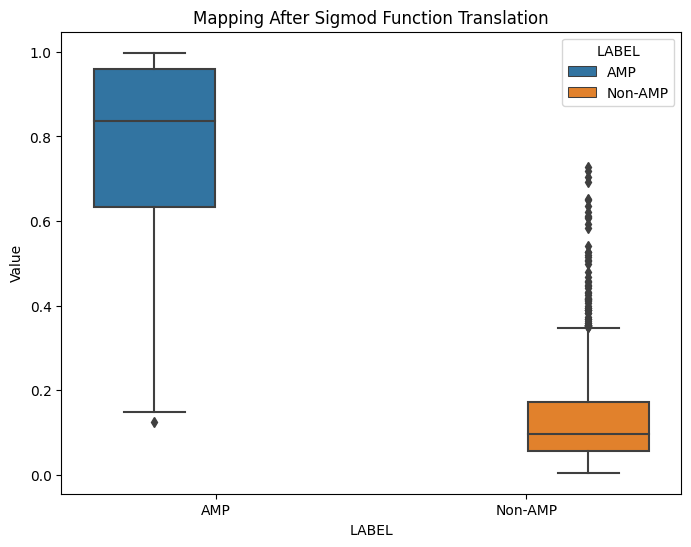

In [28]:
# 合并两个DataFrame
merged_final_df = pd.concat([AMP_predicted_clean, NON_AMP_predicted_clean], ignore_index=True)
merged_final_df['LABEL'] = merged_final_df['LABEL'].replace({0: 'Non-AMP', 1: 'AMP'})
# 使用Seaborn绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='LABEL', y='Value', hue='LABEL',data=merged_final_df)
plt.title('Mapping After Sigmod Function Translation')

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_regression_boxplot_figures_sofmaxrepaired.png")

plt.show()